# Prosper Loan Data
## by Mehul Zawar

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, io, os

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset with request libary and saving dataset as CSV file
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response = requests.get(url).content
data = pd.read_csv(io.StringIO(response.decode('utf-8')))
data.to_csv('prosperLoanData.csv', index = False)

In [3]:
# creating new data frame called loan_data
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_data.shape

(113937, 81)

In [5]:
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest is to ascertain what factors can determine the loan status and to know if the loan will not be defaulted. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Variables 'LoanStatus', 'Term','ProsperScore','EmploymentStatus', 'MonthlyLoanPayment', 'Recommendations','BorrowerAPR','BorrowerRate','LoanOriginalAmount', 'OpenCreditLines','StatedMonthlyIncome','TotalProsperPaymentsBilled', 'IncomeRange' are selected that will help me support the investigation as they closely reflect on the loan's outcome status.

In [7]:
# Columns to be subset
cols = ['ListingKey', 'LoanStatus', 'Term','ProsperScore','EmploymentStatus', 'MonthlyLoanPayment', 'Recommendations','BorrowerAPR','BorrowerRate','LoanOriginalAmount', 'OpenCreditLines','StatedMonthlyIncome','TotalProsperPaymentsBilled', 'IncomeRange']

# Creating a copy of dataframe with only columns that will be explored further.
loan_data_clean = loan_data[cols]
loan_data_clean.shape

(113937, 14)

In [8]:
loan_data_clean.sample(5)

,ListingKey,LoanStatus,Term,ProsperScore,EmploymentStatus,MonthlyLoanPayment,Recommendations,BorrowerAPR,BorrowerRate,LoanOriginalAmount,OpenCreditLines,StatedMonthlyIncome,TotalProsperPaymentsBilled,IncomeRange
74319,F9293416497533690A6A7BC,Completed,36,NaN,Full-time,104.59,0,0.28107,0.2588,2600,7.0,2500.000000,NaN,"$25,000-49,999"
66322,C17535874571157867FA321,Current,36,4.0,Employed,154.26,0,0.26528,0.2272,4000,15.0,4416.666667,NaN,"$50,000-74,999"
100622,3E253500294884170FD0C1B,Completed,36,7.0,Employed,274.94,0,0.31308,0.2775,7500,6.0,5000.000000,8.0,"$50,000-74,999"
112683,DC9A3522369849518EDBF7E,Completed,36,4.0,Employed,235.37,0,0.27467,0.2399,6000,7.0,6000.000000,7.0,"$50,000-74,999"
22643,5B3234742971901503175AB,Completed,36,9.0,Full-time,129.14,0,0.10436,0.0835,4100,4.0,3333.333333,NaN,"$25,000-49,999"


In [9]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingKey                  113937 non-null  object 
 1   LoanStatus                  113937 non-null  object 
 2   Term                        113937 non-null  int64  
 3   ProsperScore                84853 non-null   float64
 4   EmploymentStatus            111682 non-null  object 
 5   MonthlyLoanPayment          113937 non-null  float64
 6   Recommendations             113937 non-null  int64  
 7   BorrowerAPR                 113912 non-null  float64
 8   BorrowerRate                113937 non-null  float64
 9   LoanOriginalAmount          113937 non-null  int64  
 10  OpenCreditLines             106333 non-null  float64
 11  StatedMonthlyIncome         113937 non-null  float64
 12  TotalProsperPaymentsBilled  22085 non-null   float64
 13  IncomeRange   

In [10]:
# Converting datatype to categorical

cols_cat = ['ProsperScore', 'Term', 'IncomeRange', 'LoanStatus', 'EmploymentStatus']

for i in cols_cat:
    loan_data_clean[i] = loan_data_clean[i].astype('category')

loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ListingKey                  113937 non-null  object  
 1   LoanStatus                  113937 non-null  category
 2   Term                        113937 non-null  category
 3   ProsperScore                84853 non-null   category
 4   EmploymentStatus            111682 non-null  category
 5   MonthlyLoanPayment          113937 non-null  float64 
 6   Recommendations             113937 non-null  int64   
 7   BorrowerAPR                 113912 non-null  float64 
 8   BorrowerRate                113937 non-null  float64 
 9   LoanOriginalAmount          113937 non-null  int64   
 10  OpenCreditLines             106333 non-null  float64 
 11  StatedMonthlyIncome         113937 non-null  float64 
 12  TotalProsperPaymentsBilled  22085 non-null   float64 
 13 

## Univariate Exploration

> In this section, all variables have been explored to understand their distribution.

### LoanStatus

In [11]:
loan_data_clean['LoanStatus'].describe()

count      113937
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

In [12]:
loan_data_clean['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

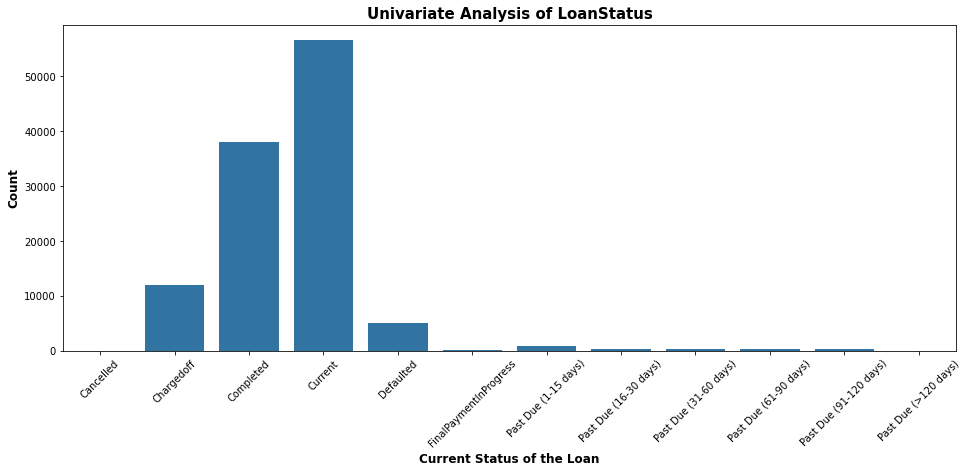

In [13]:
plt.figure(figsize = (16,6))
sns.countplot(data = loan_data_clean, x = 'LoanStatus', color = sns.color_palette()[0])
plt.xlabel('Current Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of LoanStatus', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 45);

> From the above bar chart, it can be seen that majority of the transactions fall into the category of 'Current', 'Completed', 'Chargedoff' and 'Defaulted'.

Next, I will combine all the different Past Dues variables into one variable so that it is easier to see total of Past Due w.r.t. other categories.

In [14]:
# Replacing Past Due (1-15 days), Past Due (31-60 days) etc. with just Past Due
loan_data_clean['LoanStatus'] = loan_data_clean['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],'Past Due')
# Replacing 'FinalPaymentInProgress' with InProgress
loan_data_clean['LoanStatus'] = loan_data_clean['LoanStatus'].replace('FinalPaymentInProgress','InProgress')
loan_data_clean.LoanStatus.value_counts()

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2067
InProgress      205
Cancelled         5
Name: LoanStatus, dtype: int64

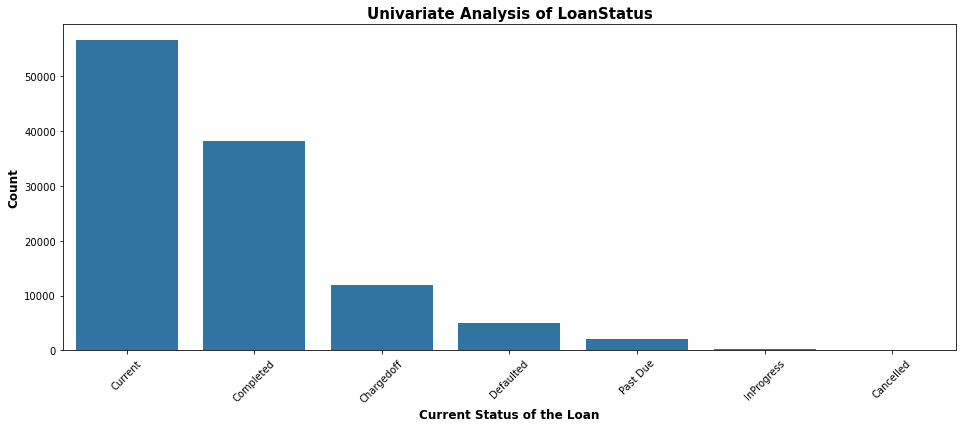

In [15]:
plt.figure(figsize = (16,6))
sns.countplot(data = loan_data_clean, x = 'LoanStatus', color = sns.color_palette()[0], order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xlabel('Current Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of LoanStatus', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 45);

Most of the loans are current or completed. However there are a fairly significant number of loans that are charged off, defaulted or past due. 

### ProsperScore

In [16]:
loan_data_clean['ProsperScore'].describe()

count     84853.0
unique       11.0
top           4.0
freq      12595.0
Name: ProsperScore, dtype: float64

In [17]:
loan_data_clean['ProsperScore'].value_counts().sort_index()

1.0       992
2.0      5766
3.0      7642
4.0     12595
5.0      9813
6.0     12278
7.0     10597
8.0     12053
9.0      6911
10.0     4750
11.0     1456
Name: ProsperScore, dtype: int64

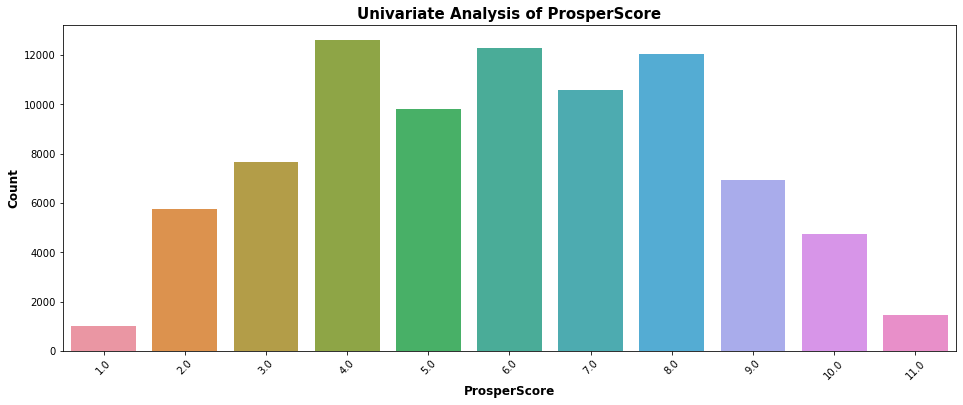

In [18]:
plt.figure(figsize = (16,6))
sns.countplot(data = loan_data_clean, x = 'ProsperScore', order = loan_data_clean['ProsperScore'].value_counts().index.sort_values())
plt.xlabel('ProsperScore', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of ProsperScore', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 45);

> ProsperScore has a rating of 11 which shows data is incorrect as the data dictionary shows that the score has values 0-10. Cleaning the same in next step.

In [19]:
loan_data_clean = loan_data_clean[loan_data_clean['ProsperScore'] != 11]
loan_data_clean.shape

(83397, 14)

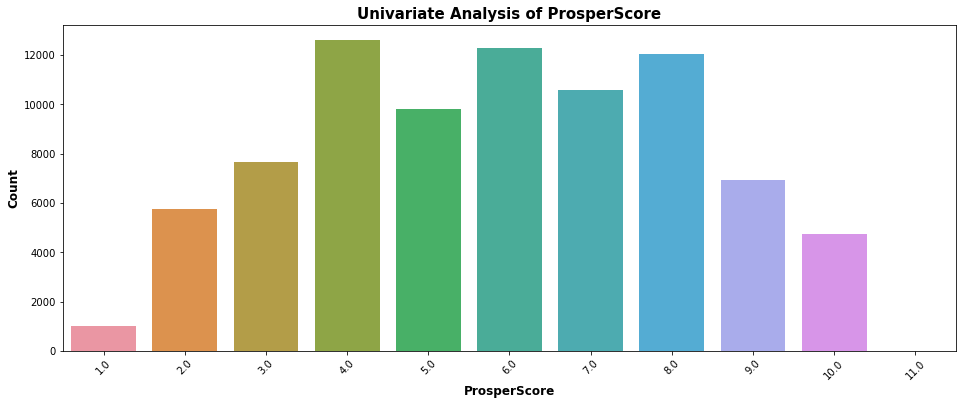

In [20]:
plt.figure(figsize = (16,6))
sns.countplot(data = loan_data_clean, x = 'ProsperScore', order = loan_data_clean['ProsperScore'].value_counts().index.sort_values())
plt.xlabel('ProsperScore', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of ProsperScore', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 45);

Most of the borrowers have rating between 4 and 8. However, some of the borrowers even have very less and very high ProsperScore too. 

### TotalProsperPaymentsBilled

In [21]:
loan_data_clean['TotalProsperPaymentsBilled'].describe()

count    18970.000000
mean        24.037375
std         19.473783
min          0.000000
25%         10.000000
50%         17.000000
75%         35.000000
max        141.000000
Name: TotalProsperPaymentsBilled, dtype: float64

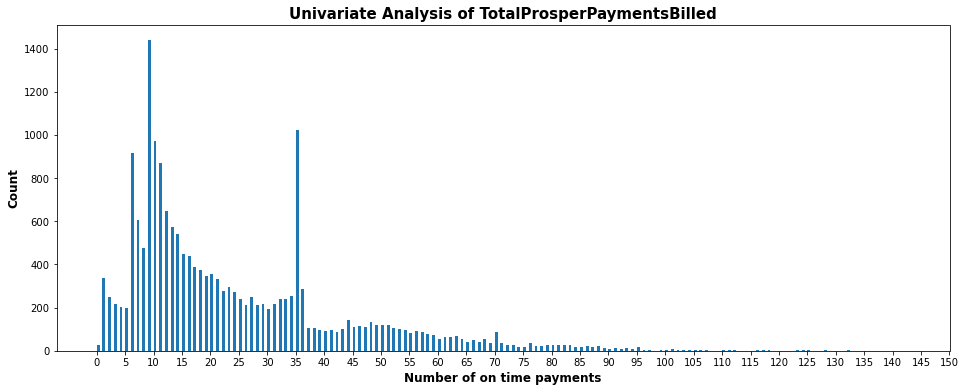

In [22]:
binsize = 0.5
bins = np.arange(loan_data_clean.TotalProsperPaymentsBilled.min(), loan_data_clean.TotalProsperPaymentsBilled.max()+binsize, binsize)

plt.figure(figsize = (16,6))
plt.hist(data = loan_data_clean, x = 'TotalProsperPaymentsBilled', bins = bins)
plt.xlabel('Number of on time payments', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of TotalProsperPaymentsBilled', fontweight = 'bold', fontsize = 15)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150])
plt.show()

The distribution is right skewed with two peaks at 9 and 35.

### BorrowerRate

In [23]:
loan_data_clean['BorrowerRate'].describe()

count    83397.000000
mean         0.197815
std          0.073931
min          0.040000
25%          0.139600
50%          0.189900
75%          0.257900
max          0.360000
Name: BorrowerRate, dtype: float64

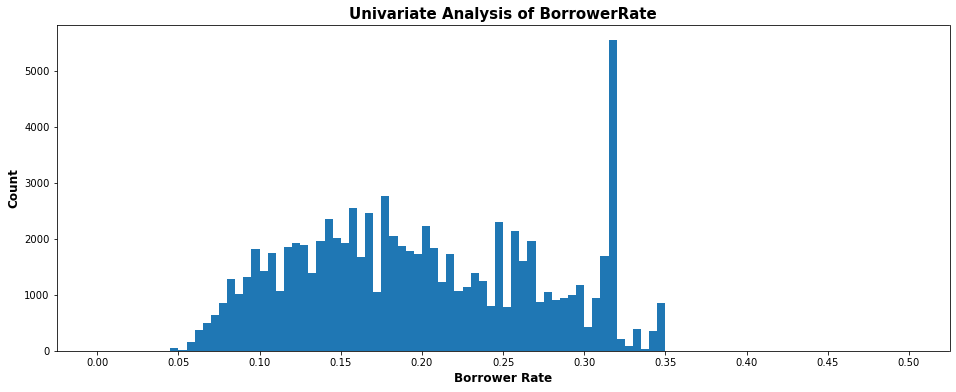

In [24]:
binsize = 0.005
bins = np.arange(loan_data.BorrowerRate.min(), loan_data.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize = (16,6))
plt.hist(data = loan_data_clean, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of BorrowerRate', fontweight = 'bold', fontsize = 15)
plt.xticks([0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50])
plt.show()

The histogramm shows that most of the borrowers have an interest rate between of 0.10 and 0.25, with a peak at around 0.33

### IncomeRange

In [25]:
loan_data_clean['IncomeRange'].describe()

count              83397
unique                 7
top       $50,000-74,999
freq               25261
Name: IncomeRange, dtype: object

In [26]:
loan_data_clean['IncomeRange'].value_counts()

$50,000-74,999    25261
$25,000-49,999    24047
$100,000+         14565
$75,000-99,999    14183
$1-24,999          4647
Not employed        649
$0                   45
Not displayed         0
Name: IncomeRange, dtype: int64

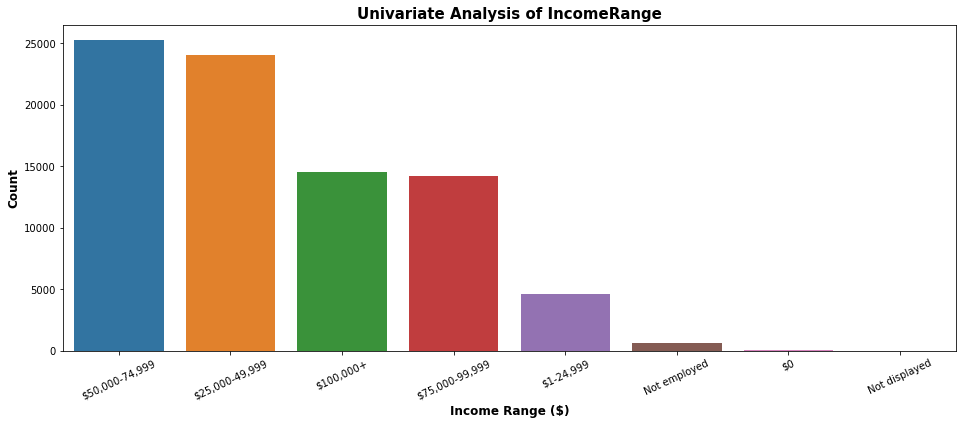

In [27]:
plt.figure(figsize = (16,6))
sns.countplot(data= loan_data_clean, x = 'IncomeRange', order = loan_data_clean['IncomeRange'].value_counts().index)
plt.xticks(rotation=25)
plt.xlabel('Income Range ($)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of IncomeRange', fontweight = 'bold', fontsize = 15);

Most of the borrowers have income range between \\$ 25000 - $ 75000. Some interesting facts are that loan was disbursed even to borrowers who are not employed or have no income. This indicates that Income is not the only criteria for disbursing loan.

### EmploymentStatus

In [28]:
loan_data_clean['EmploymentStatus'].describe()

count        83397
unique           7
top       Employed
freq         65945
Name: EmploymentStatus, dtype: object

In [29]:
loan_data_clean['EmploymentStatus'].value_counts()

Employed         65945
Full-time         7913
Self-employed     4495
Other             3772
Not employed       649
Retired            367
Part-time          256
Not available        0
Name: EmploymentStatus, dtype: int64

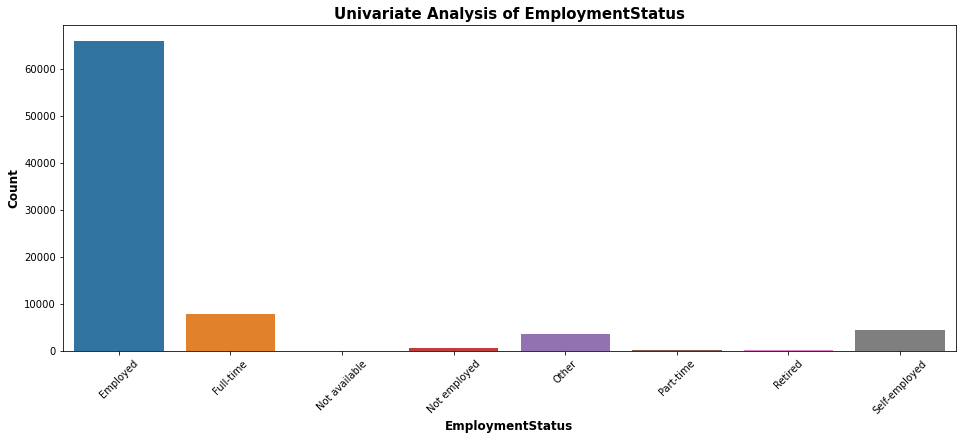

In [30]:
plt.figure(figsize = (16,6))
sns.countplot(data = loan_data_clean, x = 'EmploymentStatus')
plt.xlabel('EmploymentStatus', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of EmploymentStatus', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 45);

Most of the borrowers are employed (full-time, part-time, self-emplpoyed) but some unemployed and retired persons also received the loan.

### Term

In [31]:
loan_data_clean['Term'].describe()

count     83397
unique        3
top          36
freq      57646
Name: Term, dtype: int64

In [32]:
loan_data_clean['Term'].value_counts()

36    57646
60    24138
12     1613
Name: Term, dtype: int64

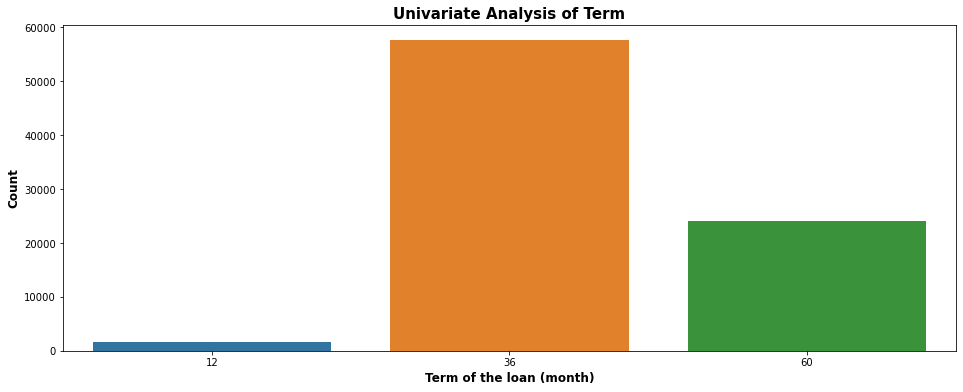

In [33]:
plt.figure(figsize = (16,6))
sns.countplot(data = loan_data_clean, x = 'Term', order = loan_data_clean['Term'].value_counts().index.sort_values())
plt.xlabel('Term of the loan (month)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of Term', fontweight = 'bold', fontsize = 15);

Majority of the loans have term of 36 months, followed by 60 months. Minimum term of loan is 12 months.

### Recommendations

In [34]:
loan_data_clean['Recommendations'].describe()

count    83397.000000
mean         0.017291
std          0.187729
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: Recommendations, dtype: float64

In [35]:
loan_data_clean['Recommendations'].value_counts()

0     82223
1       994
2       150
3        22
18        2
5         2
4         2
19        1
9         1
Name: Recommendations, dtype: int64

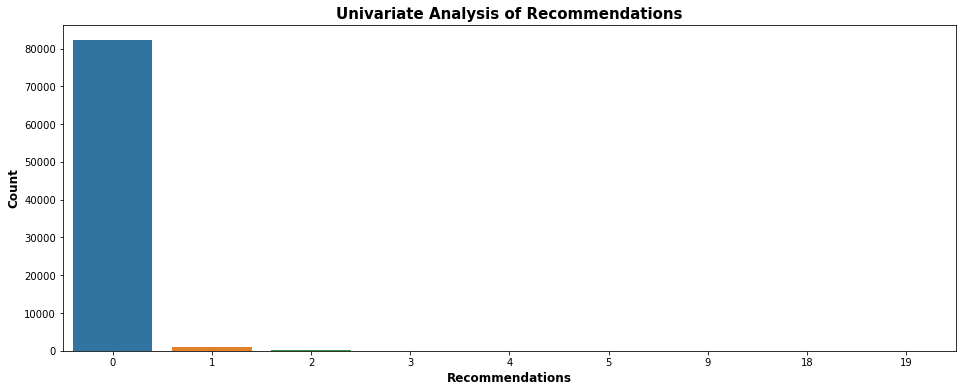

In [36]:
plt.figure(figsize = (16,6))
sns.countplot(data=loan_data_clean, x = 'Recommendations')
plt.xlabel('Recommendations', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.title('Univariate Analysis of Recommendations', fontweight = 'bold', fontsize = 15);

Most of the disbursed loan have 0 recommendations. Therefore, it can be inferred that recommendation do not play any significant role in disbursing the loan.

### BorrowerAPR

In [37]:
loan_data_clean['BorrowerAPR'].describe()

count    83397.000000
mean         0.228663
std          0.079011
min          0.045830
25%          0.167320
50%          0.221400
75%          0.293410
max          0.423950
Name: BorrowerAPR, dtype: float64

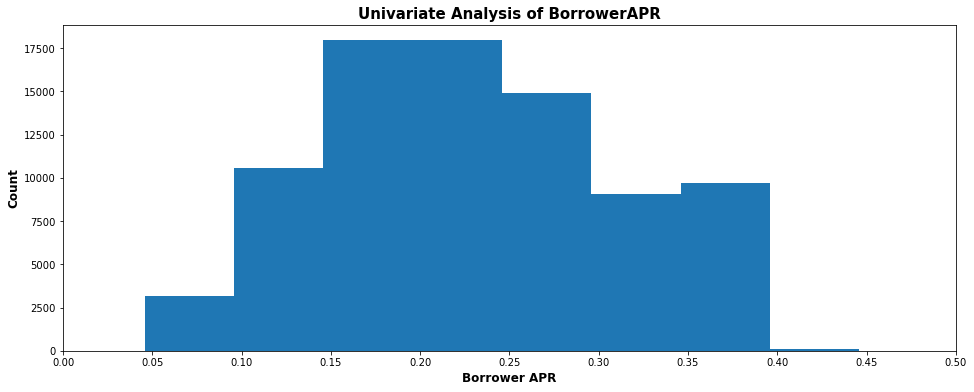

In [38]:
binsize = 0.05
bins = np.arange(loan_data_clean['BorrowerAPR'].min(), loan_data_clean['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize = (16,6))
plt.hist(data = loan_data_clean, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.xticks([0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50])
plt.title('Univariate Analysis of BorrowerAPR', fontweight = 'bold', fontsize = 15);
plt.show()

### OpenCreditLines

In [39]:
loan_data_clean['OpenCreditLines'].describe()

count    83397.000000
mean         9.497452
std          4.926235
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         54.000000
Name: OpenCreditLines, dtype: float64

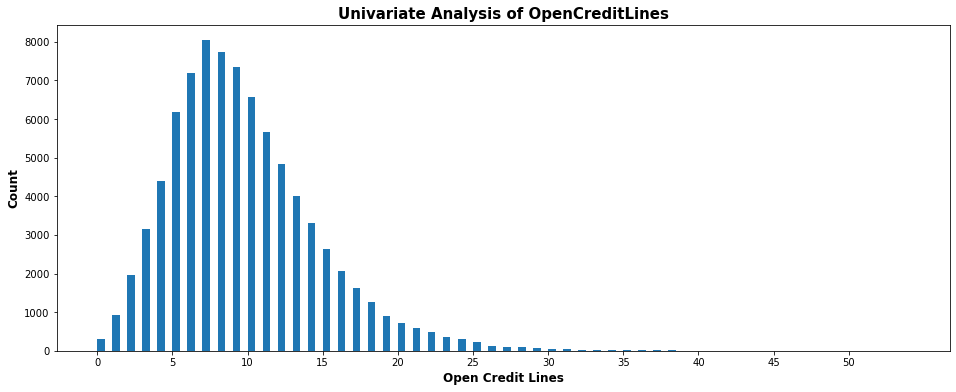

In [40]:
binsize = 0.5
bins = np.arange(loan_data_clean['OpenCreditLines'].min(), loan_data_clean['OpenCreditLines'].max()+binsize, binsize)

plt.figure(figsize = (16,6))
plt.hist(data = loan_data_clean, x = 'OpenCreditLines', bins = bins)
plt.xlabel('Open Credit Lines', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.title('Univariate Analysis of OpenCreditLines', fontweight = 'bold', fontsize = 15);
plt.show()

The distribution is right skewed with borrowers generally having number of open credit lines between 5 and 15.

### LoanOriginalAmount

In [41]:
loan_data_clean['LoanOriginalAmount'].describe()

count    83397.000000
mean      8982.621185
std       6202.474999
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

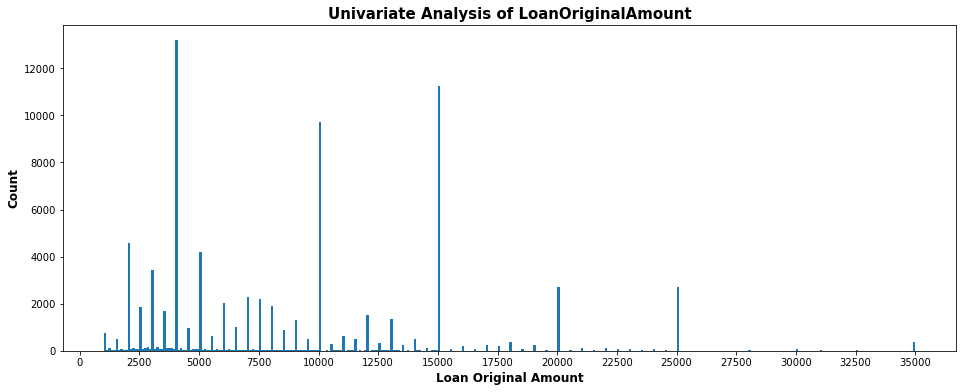

In [42]:
binsize = 100
bins = np.arange(loan_data_clean['LoanOriginalAmount'].min(), loan_data_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize = (16,6))
plt.hist(data = loan_data_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000, 27500, 30000, 32500, 35000])
plt.title('Univariate Analysis of LoanOriginalAmount', fontweight = 'bold', fontsize = 15);
plt.show()

- The distribution has several peaks around \\$ 4000, \\$ 10000, \\$ 15000. 
- Most of the values are in the range \\$ 2500 to \\$ 10000.

### MonthylLoanPayment

In [43]:
loan_data_clean['MonthlyLoanPayment'].describe()

count    83397.000000
mean       289.624312
std        184.789967
min          0.000000
25%        156.810000
50%        249.050000
75%        385.740000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

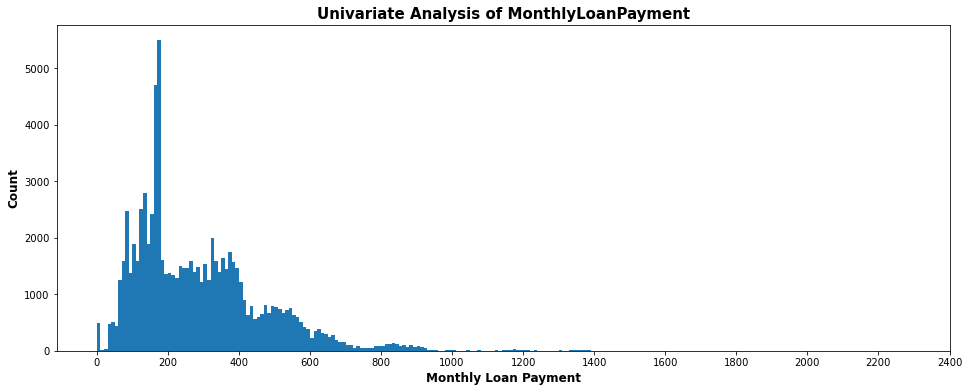

In [44]:
binsize = 10
bins = np.arange(loan_data_clean['MonthlyLoanPayment'].min(), loan_data_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize = (16,6))
plt.hist(data = loan_data_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400])
plt.title('Univariate Analysis of MonthlyLoanPayment', fontweight = 'bold', fontsize = 15);
plt.show()

The distribution is right skewed. Most of the monthly loan payment are in the range \\$ 100 to \\$ 400. The peak is around \\$ 200. There are also few observations with 0 monthly loan payment. It may be because of some special arrangement like moratorium period.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 - Most of the loans are current or completed. However there are a fairly significant number of loans that are charged off, defaulted or past due. 
 - The income range of the borrowers shows that most of the loans where give to customers with a income between 25,000 and 74,999 which indicates that the borrowers are mostly middle-class.
 - Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan from Prosper. Furthermore, not many borrowers received the highest score of 10.
 - The distribution of the lenght of the loan (Term) shows that most of the loans have of length of 36 months, followed by 60 months while just a small amounts of loans have the minium lenght of 12 months.
 - The distribution of the Number of on time payments is long-tailed with two peaks: 9 and 35. It is interesting to see that the distribution is right-skewed with most of the values on the lower end and fewer values on the higher end. But we observe a second uprise between 30-36. This would make the distribution roughly bi-modial. On the first view it therefore seems like that most of the borrowers had missed to pay some of the monthly payments on time.
 - The distribution of the loan amount has serval peaks at around 4,000, 10,000 and 15,000. But most of the values are in the lower end between 2500 and 10,000.
 - The distribution of the open credit line is long-tailed and right skewed with most borrowers having between 5 and 15 open credit lines.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Unusual distributions - 
 - One can also see in the distribution of the Employment status that people that are not employed, not displayed their income or have an income of 0 received a loan from Prosper as well. They might be other criterias than income that qualifies one to get a loan at Prosper.
 - it was a little bit suprising that the distribution of the loan amounts has several peaks: the two most loaned amounts (the two highest peaks in the distribution, 4000 & 15000) have such a difference in terms of the loan amount. One would expect one peak; but maybe Prosper targets several customer groups
 - As expected are most of the borrowers employed of some kind (full-time, part-time, self-emplpoyed) but the data shows that even unemployed and retired persons could get a loan.
 
Tidy, Adjust, change the form of data - 
 - Since the variables EmploymentStatus, ProsperScore, Term, IncomeRange are basically categorical variabels, I changed their datatype till categorical

 - The bar chart of the Prosper Score showed that there are customers in the data set that have a score of 11 which should not be possible since the score just ranges from 1-10 which I cleaned (removed them from the dataset)

 - Around 1000 loans have a monthly payment of 0 which doesnt really make sense but might be related to some special arrangement (for example: the customer does not need to pay back the loan during the first 6 months). Therefore, I decided to the keep these values in the dataset.

## Bivariate Exploration

> In this section, I have plotted relationship between variables and the LoanStatus. In the first part, I have plotted boxplot and violinplot for numeric variables with LoanStatus and in the second part, I have plotted for categorical variables with LoanStatus. Since the loan status `current` and `FinalPaymentInProgress` doesnt really say much about the outcome and will change its status over time, the investigation will not put much emphasis on this status and rather focus on the ones that are completed versus the ones that `defaulted`, `charged-off` and `past due`.

### Numeric Variables

#### LoanStatus vs MonthlyLoanPayment

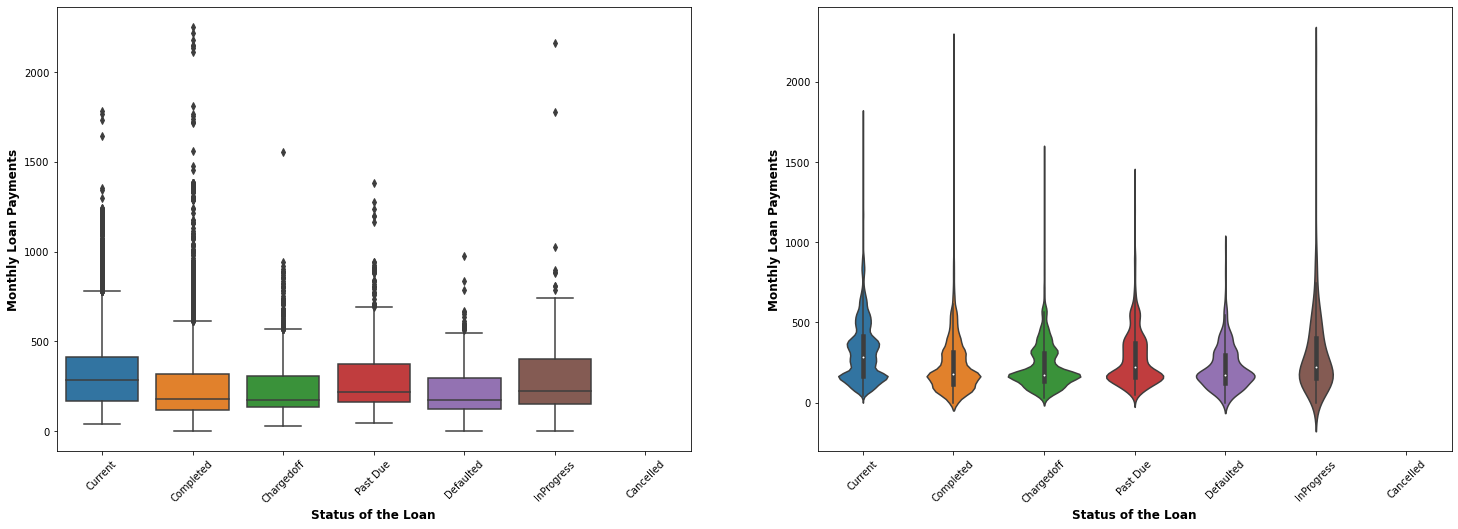

In [45]:
plt.figure(figsize = (25, 18))

plt.subplot(221)
sns.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'MonthlyLoanPayment', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Monthly Loan Payments', fontweight = 'bold', fontsize = 12)

plt.subplot(222)
sns.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'MonthlyLoanPayment', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Monthly Loan Payments', fontweight = 'bold', fontsize = 12);

The plots show that there is relationship between the monthly payments and the negative outcome of the loan for Prosper: loans that are charged-off, loans with past due payments and defaulted loans have in average higher monthly payments.

#### LoanStatus vs Recommendations

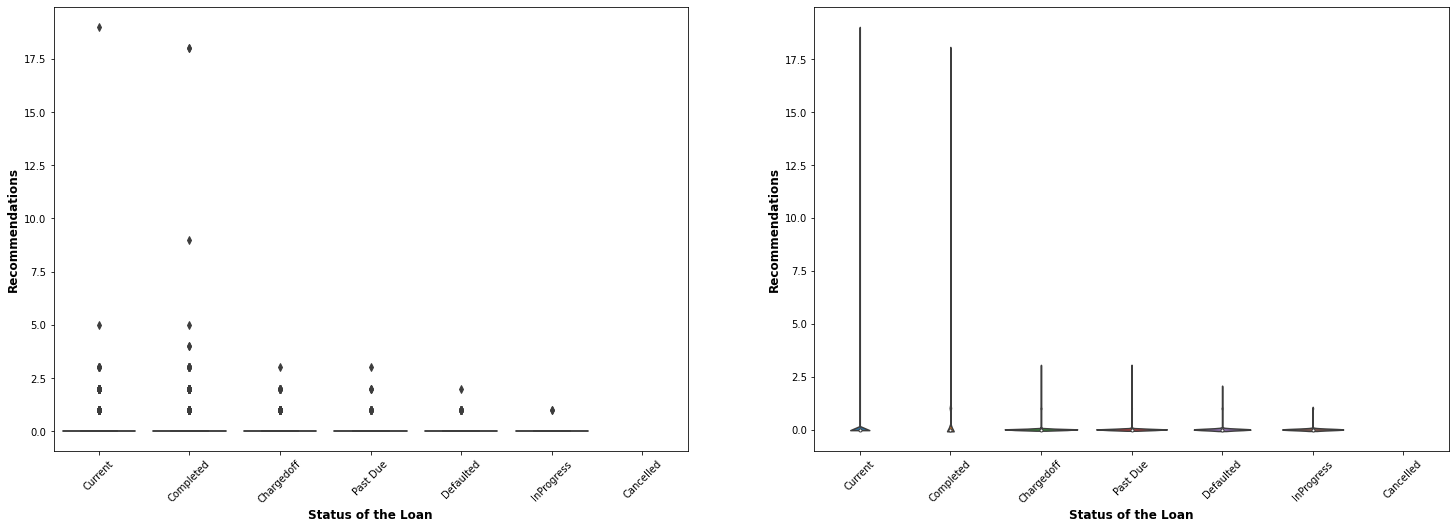

In [46]:
plt.figure(figsize = (25, 18))

plt.subplot(221)
sns.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'Recommendations', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Recommendations', fontweight = 'bold', fontsize = 12)

plt.subplot(222)
sns.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'Recommendations', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Recommendations', fontweight = 'bold', fontsize = 12);

It is difficult to establish any relationship between Recommendation and LoanStatus.

#### LoanStatus vs BorrowerRate

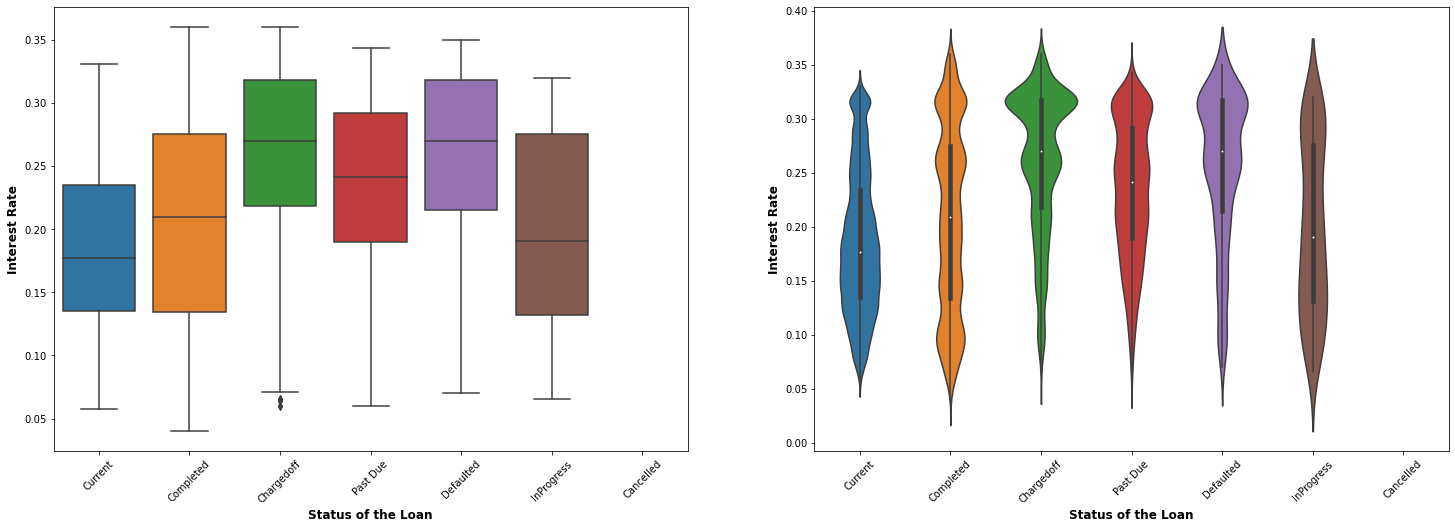

In [47]:
plt.figure(figsize = (25, 18))

plt.subplot(221)
sns.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'BorrowerRate', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Interest Rate', fontweight = 'bold', fontsize = 12)

plt.subplot(222)
sns.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'BorrowerRate', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Interest Rate', fontweight = 'bold', fontsize = 12);

The plots clearly show that loans that are charged-off, loans with past due payments and defaulted loans have in average higher interest rates than loans that are completed. The highest interest rates are asscociated with loans that are charged-off and with loans that have past due payments

#### Loan Status vs Original Loan Amount

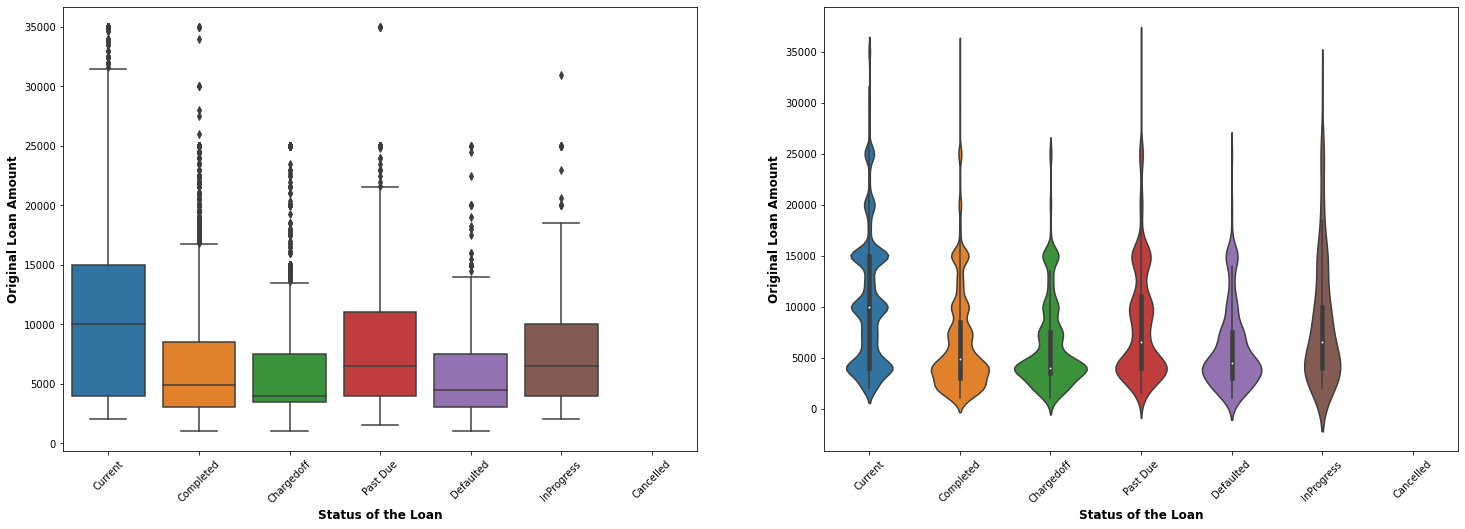

In [48]:
plt.figure(figsize = (25, 18))

plt.subplot(221)
sns.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Original Loan Amount', fontweight = 'bold', fontsize = 12)

plt.subplot(222)
sns.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Original Loan Amount', fontweight = 'bold', fontsize = 12);

It seems that the original loan amount doesnt have an impact with the final status of the loan: the original loan amount is about the same in average for loans that are completed, charged-off or defaulted. However, loans with past due payments have in average an higher orginal loan amount

#### LoanStatus vs OpenCreditLines

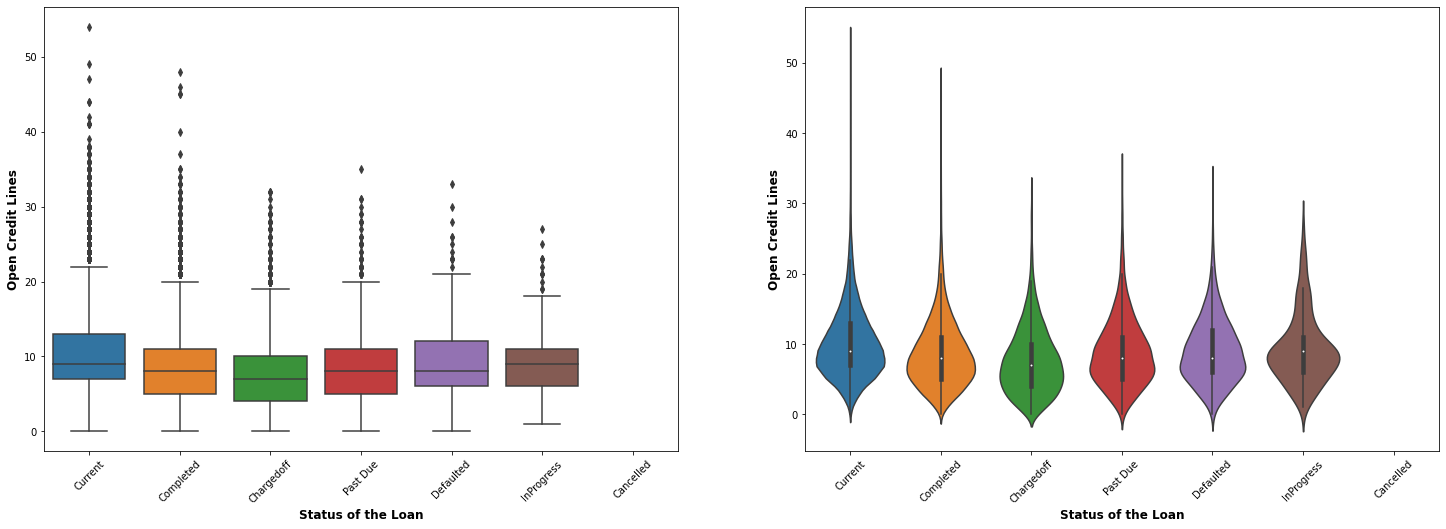

In [49]:
plt.figure(figsize = (25, 18))

plt.subplot(221)
sns.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'OpenCreditLines', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Open Credit Lines', fontweight = 'bold', fontsize = 12)

plt.subplot(222)
sns.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'OpenCreditLines', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Open Credit Lines', fontweight = 'bold', fontsize = 12);

The amount of open credit lines doesnt have an direct impact on the outcome of a loan.

#### LoanStatus vs TotalProsperPaymentsBilled

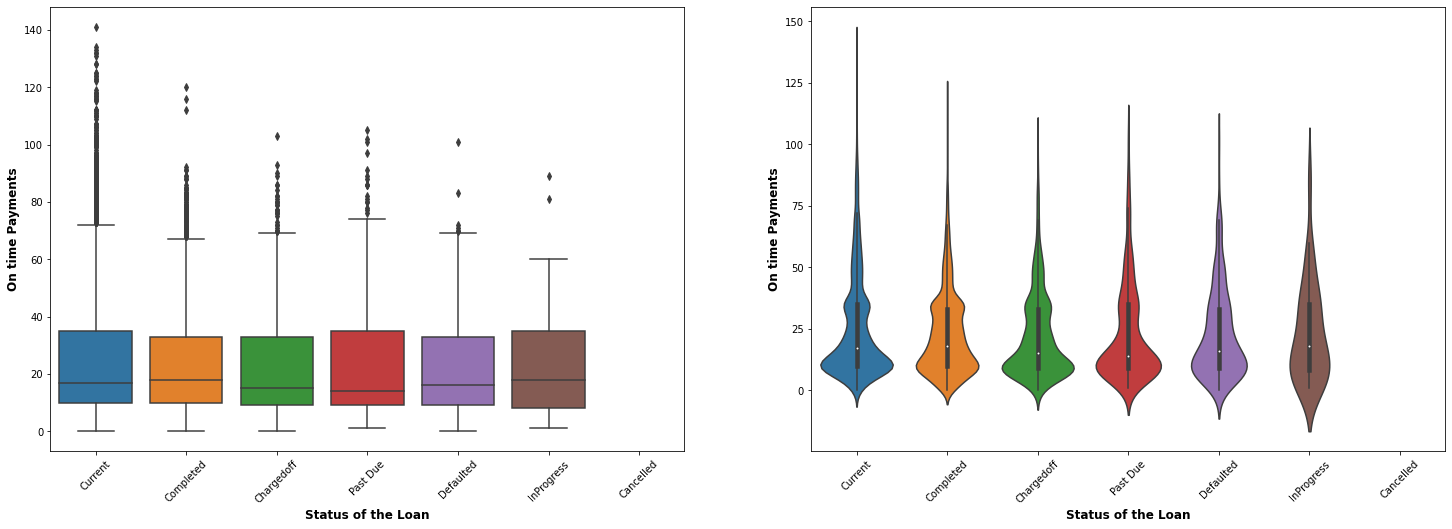

In [50]:
plt.figure(figsize = (25, 18))

plt.subplot(221)
sns.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'TotalProsperPaymentsBilled', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('On time Payments', fontweight = 'bold', fontsize = 12)

plt.subplot(222)
sns.violinplot(data = loan_data_clean, x = 'LoanStatus', y = 'TotalProsperPaymentsBilled', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('On time Payments', fontweight = 'bold', fontsize = 12);

The plots show that the status of the loan is associated with the number of on time payments: completet loans have in average the highest number of on time paymnets while loans with the status charged-off and defaulted have the lowest

### Categorical variables

#### Loan Status vs Term

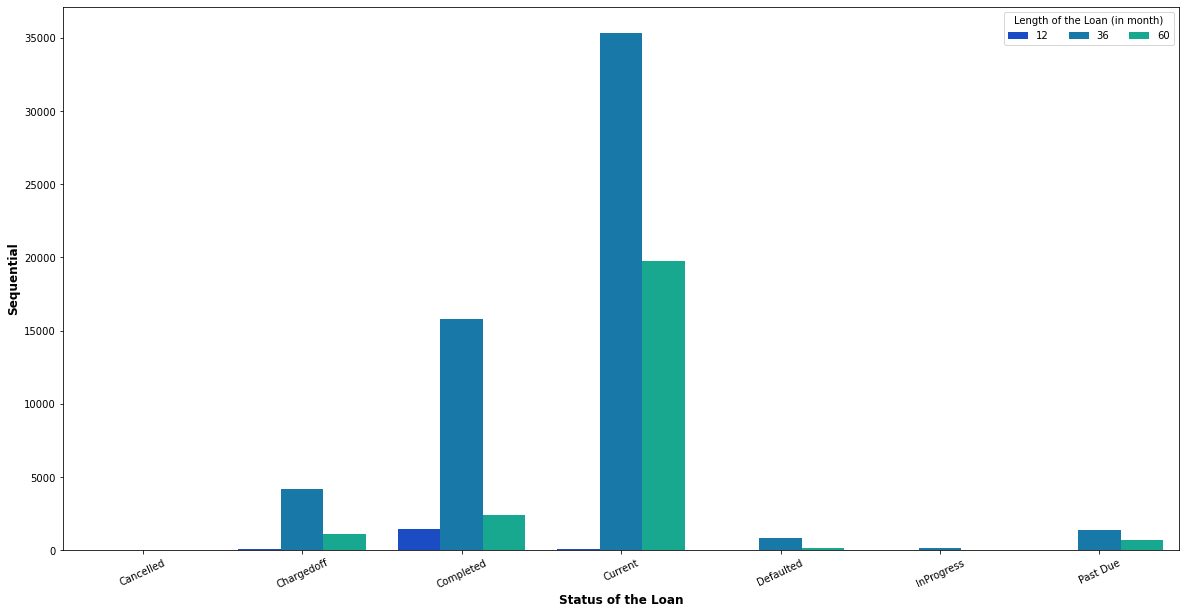

In [51]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = loan_data_clean, x = 'LoanStatus', hue = 'Term', palette = "winter", order = loan_data_clean['LoanStatus'].value_counts().index.sort_values())
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
ax.set_ylabel("Sequential", fontweight = 'bold', fontsize = 12);

In all the categories, 36 month term period prevails. Therefore, no significant inferences can be drawn.

### LoanStatus vs EmploymentStatus

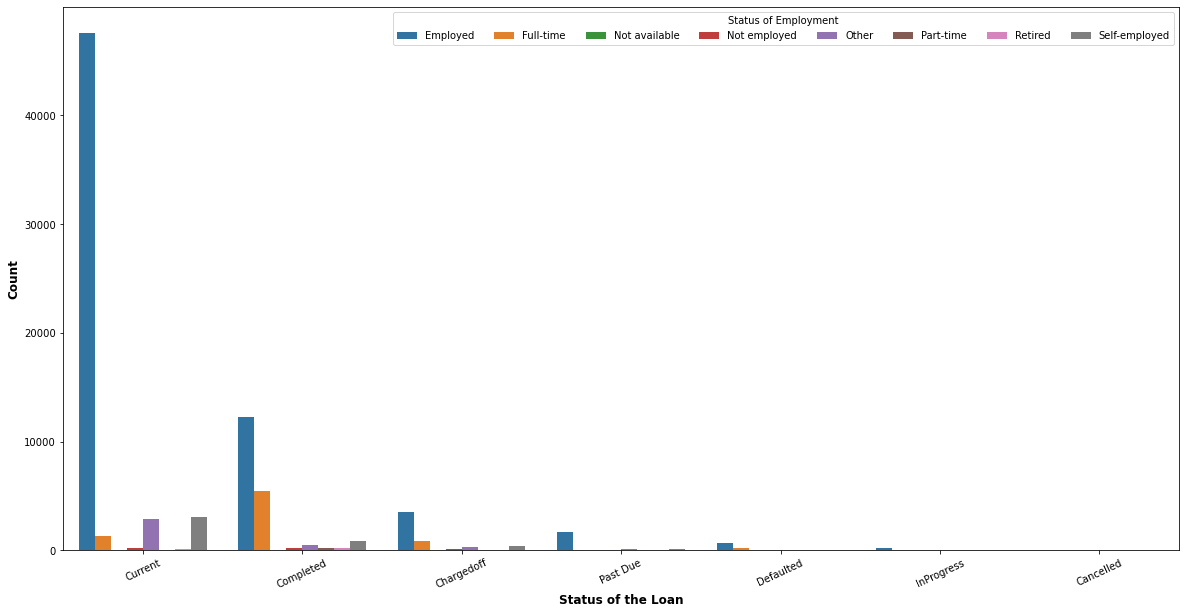

In [52]:
plt.figure(figsize = (20,10))
sns.countplot(data = loan_data_clean, x = 'LoanStatus', hue = 'EmploymentStatus', order = loan_data_clean['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12);

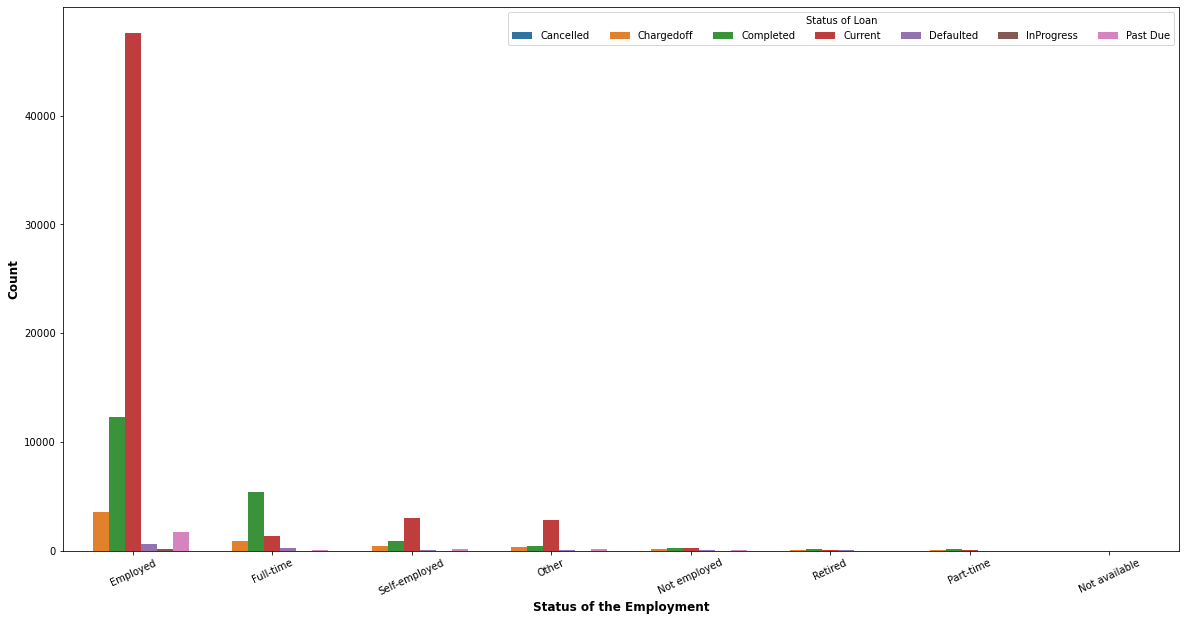

In [53]:
plt.figure(figsize = (20,10))
sns.countplot(data = loan_data_clean, x = 'EmploymentStatus', hue = 'LoanStatus', order = loan_data_clean['EmploymentStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Status of Loan')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Employment', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12);

The status of the employment of the borrower seem not to have any direct impact on the outcome of the loan.

#### LoanStatus vs ProsperScore

In [54]:
ct_counts = loan_data_clean.groupby(['LoanStatus', 'ProsperScore']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')
ct_counts

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,InProgress,Past Due
ProsperScore,,,,,,,
1.0,0,235,341,337,37,2,40
2.0,0,377,848,4196,70,23,252
3.0,0,414,1077,5804,75,20,252
4.0,0,784,1828,9476,119,28,360
5.0,0,907,2212,6222,165,25,282
6.0,0,925,2847,7981,173,25,327
7.0,0,662,2357,7210,135,16,217
8.0,0,666,3711,7265,139,39,233
9.0,0,309,2836,3612,71,13,70


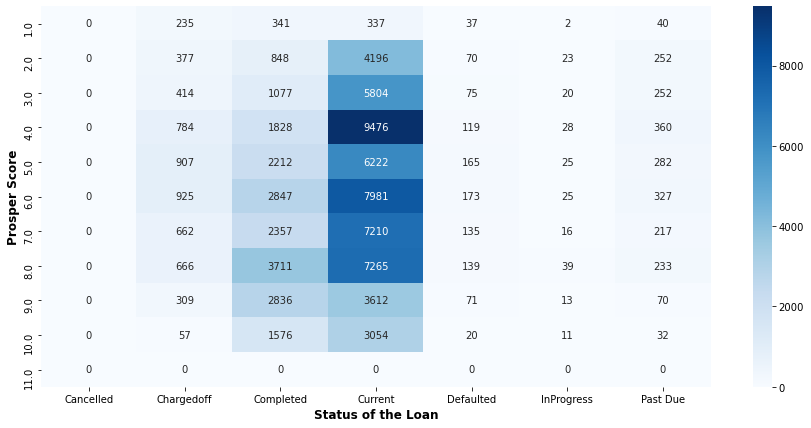

In [55]:
plt.figure(figsize = (15,7))
sns.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues', mask = ct_counts.isnull())
plt.xlabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
plt.ylabel('Prosper Score', fontweight = 'bold', fontsize = 12);

The Prosper Score seem to affect the outcome of the loan: so have the most borrower an Prosper Score of 8 when a loan is completed, while most borrower with defaulted and charged-off loans have an Prosper Score of 6. Furthermore, the most comon Prosper Score for borrowers with loans that have past due payments is 4.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Relationship between the monthly payments and the negative outcome of the loan for Prosper: loans that are charged-off, loans with past due payments and defaulted loans have in average higher monthly payments
- Loans that are charged-off, loans with past due payments and defaulted loans have in average higher interest rates than loans that are completed
- The highest interest rates are asscociated with loans that are charged-off and with loans that have past due payments
- Original loan amount does not have an impact with the final status of the loan: the original loan amount is about the same in average for loans that are completed, charged-off or defaulted. However, loans with past due payments have in average an higher orginal loan amount
- The Prosper Score seem to affect the outcome of the loan: so have the most borrower an Prosper Score of 8 when a loan is completed, while most borrower with defaulted and charged-off loans have an Prosper Score of 6.  Furthermore, the most comon Prosper Score for borrowers with loans that have past due payments is 4.

## Multivariate Exploration

> I would like to further investigate the relationship between the status/outcome of a loan and the Prosper Score in relation to the interest rate, On time Payments  since they seem to have the strongest impact on the outcome of a loan.

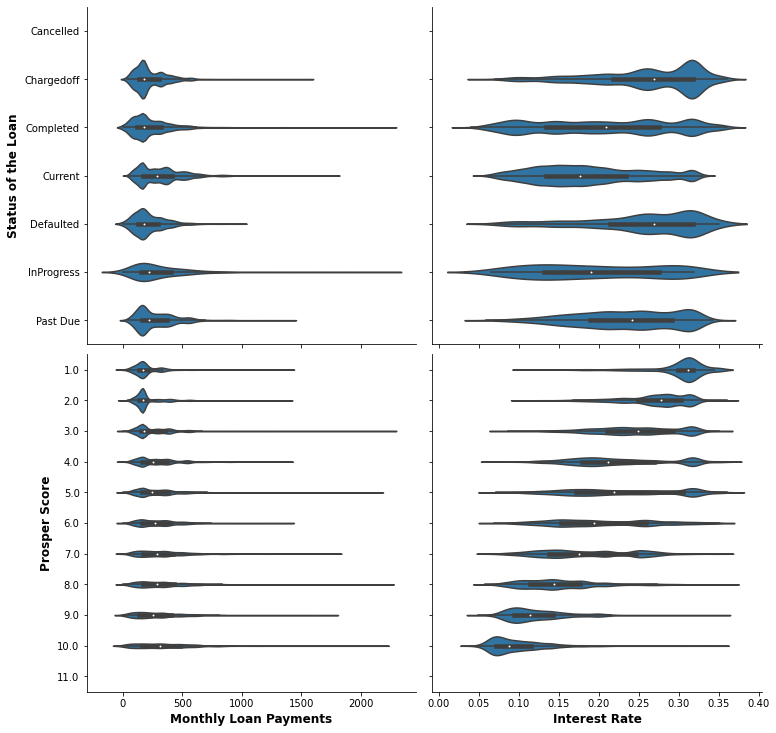

In [56]:
g = sns.PairGrid(data = loan_data_clean, x_vars = ['MonthlyLoanPayment', 'BorrowerRate'],
                y_vars = ['LoanStatus','ProsperScore'], height = 5, aspect = 1)
g.map(sns.violinplot)
g.axes[1,0].set_xlabel('Monthly Loan Payments', fontweight = 'bold', fontsize = 12)
g.axes[1,1].set_xlabel('Interest Rate', fontweight = 'bold', fontsize = 12)
g.axes[0,0].set_ylabel('Status of the Loan', fontweight = 'bold', fontsize = 12)
g.axes[1,0].set_ylabel('Prosper Score', fontweight = 'bold', fontsize = 12);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

### Were there any interesting or surprising interactions between features?

> The figure shows that the interest rate is as well correlated to the Prosper Score as to the Status of the loan: the higher the Prosper Score, the lower the interest rate, the lower the risk for Prosper that the loan will be defaulted, charged-off or has past due payments. So, borrower with a low Prosper Score get a lower interest rate due to the lower risk that the loan will be defaulted.


> On the contrary, borrower with a high Prosper Rates have higher monthly payments but higher payments are more common in loas that are defaulted, charged-off or that have past due payments. This inconsistency might be explanable by the fact that people with higher Prosper Score have higher income and therefore higher monthly payments. While borrower with low income and high monthly payments are more likley to miss a payment or default the loan.

In [57]:
# Storing clean data into new csv file
loan_data_clean.to_csv('loan_data_master.csv', index = False)